In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
display(stud.sample(10))
stud.info()
stud.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
213,GP,M,18,U,GT3,T,2.0,2.0,services,other,home,mother,1.0,2.0,1.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,4.0,5.0,15.0,40.0
234,GP,M,16,U,LE3,NaN,1.0,1.0,other,other,home,mother,NaN,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,no,3.0,4.0,2.0,5.0,18.0,30.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
297,GP,F,18,U,LE3,T,4.0,3.0,other,other,home,other,2.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,2.0,10.0,40.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [3]:
def val_counts_all_collumns(coll):

    # считаем количество значений по всем колонкам датасета

    display(pd.DataFrame(stud.loc[:, coll].value_counts()))
    display(pd.DataFrame(stud.loc[:, coll].value_counts()).sum())


for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'studytime, granular', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
            'absences', 'score']:
    val_counts_all_collumns(col)

,school
GP,349
MS,46


school    395
dtype: int64

,sex
F,208
M,187


sex    395
dtype: int64

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


age    395
dtype: int64

,address
U,295
R,83


address    378
dtype: int64

,famsize
GT3,261
LE3,107


famsize    368
dtype: int64

,Pstatus
T,314
A,36


Pstatus    350
dtype: int64

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Medu    392
dtype: int64

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Fedu    371
dtype: int64

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Mjob    376
dtype: int64

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Fjob    359
dtype: int64

,reason
course,137
home,104
reputation,103
other,34


reason    378
dtype: int64

,guardian
mother,250
father,86
other,28


guardian    364
dtype: int64

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


traveltime    367
dtype: int64

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


studytime    388
dtype: int64

,failures
0.0,293
1.0,49
2.0,16
3.0,15


failures    373
dtype: int64

,schoolsup
no,335
yes,51


schoolsup    386
dtype: int64

,famsup
yes,219
no,137


famsup    356
dtype: int64

,paid
no,200
yes,155


paid    355
dtype: int64

,activities
yes,195
no,186


activities    381
dtype: int64

,nursery
yes,300
no,79


nursery    379
dtype: int64

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


studytime, granular    388
dtype: int64

,higher
yes,356
no,19


higher    375
dtype: int64

,internet
yes,305
no,56


internet    361
dtype: int64

,romantic
no,240
yes,124


romantic    364
dtype: int64

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


famrel    368
dtype: int64

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


freetime    384
dtype: int64

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


goout    387
dtype: int64

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


health    380
dtype: int64

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


absences    383
dtype: int64

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


score    389
dtype: int64

In [4]:
# В колонках: 'school', 'sex', 'age' нет пропущенных значений или ошибок

# В колонке 'Fedu' исправляем ошибку в данных: вместо "40" ставим "4"

# В колнках 'studytime' и 'studytime, granular' указана идентичная информация, можно одну убрать

# В колонке 'famrel' исправляем ошибку в данных: вместо "-1" ставим "1"

# Поскобку нас интересует как факторы влияют на результат 'score', можно сразу убрать пустые значения из последней колонки

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

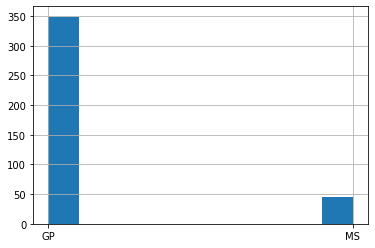

In [5]:
# колонка 'school': пропусков нет. Большинство учится в школе "GP"

stud.school.hist()
stud.school.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

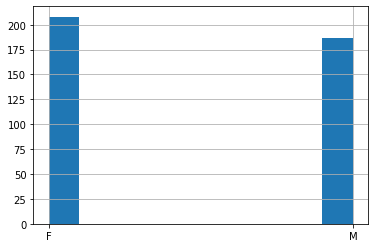

In [6]:
# колонка 'sex': пропусков нет. Большинство учеников женского пола

stud.sex.hist()
stud.sex.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

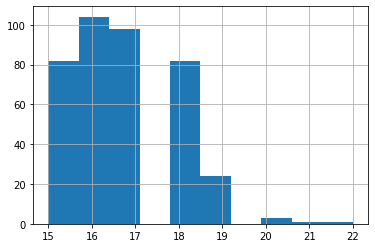

In [7]:
# колонка 'age': основное распределение лежит между 15 и 18 годами и есть небольшое количество учеников, чей возраст выше 20 лет
stud.age.hist()
stud.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


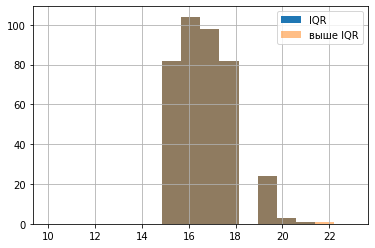

In [8]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(10, 23),
                                                                        label='IQR')
stud.age.loc[stud.age <= 100].hist(alpha=0.5, bins=16, range=(10, 23),
                                   label='выше IQR')
plt.legend()

In [9]:
# колонка 'address''famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'paid',
#           'activities', 'nursery', 'higher', 'internet', 'romantic': заполняем пустые строки значением None


def del_nan(x):
    # меняем пустые строчки в колонке на значение None

    if pd.isnull(x):
        return None
    if str.lower(x) == 'nan':
        return None
    if x.strip == '':
        return None
    else:
        return x.strip()


for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stud[col] = stud[col].apply(del_nan)

In [10]:
# колонка 'Fedu': исправляем значение "40" на "4"

stud[stud.Fedu == 40] = stud[stud.Fedu == 40].replace(40, 4)

In [16]:
stud.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [17]:
# колонка 'famrel': исправляем значение "-1" на "1"

stud[stud.famrel < 0] = stud[stud.famrel < 0].replace(-1, 1)
stud.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [18]:
# колонка 'studytime': указана информация, идентичная  'studytime, granular', можно одну убрать (оставляем 'studytime')

a = stud[stud.studytime == 1].studytime.count(
) == stud[stud['studytime, granular'] == -3]['studytime, granular'].count()

b = stud[stud.studytime == 2].studytime.count(
) == stud[stud['studytime, granular'] == -6]['studytime, granular'].count()

c = stud[stud.studytime == 3].studytime.count(
) == stud[stud['studytime, granular'] == -9]['studytime, granular'].count()

d = stud[stud.studytime == 4].studytime.count(
) == stud[stud['studytime, granular'] == -12]['studytime, granular'].count()

if a and b and c and d == True:
    print('значения в колонках "studytime" и "studytime, granular" говорят об одном и том же')
    stud.drop('studytime, granular', axis=1, inplace=True)

значения в колонках "studytime" и "studytime, granular" говорят об одном и том же


In [21]:
# колонка 'score': оставляем в датасете только заполненные значения и значения выше 0
# предполагаем, что 0 ставили, если студенn не появился на экзамене

stud = stud[stud.score > 0]

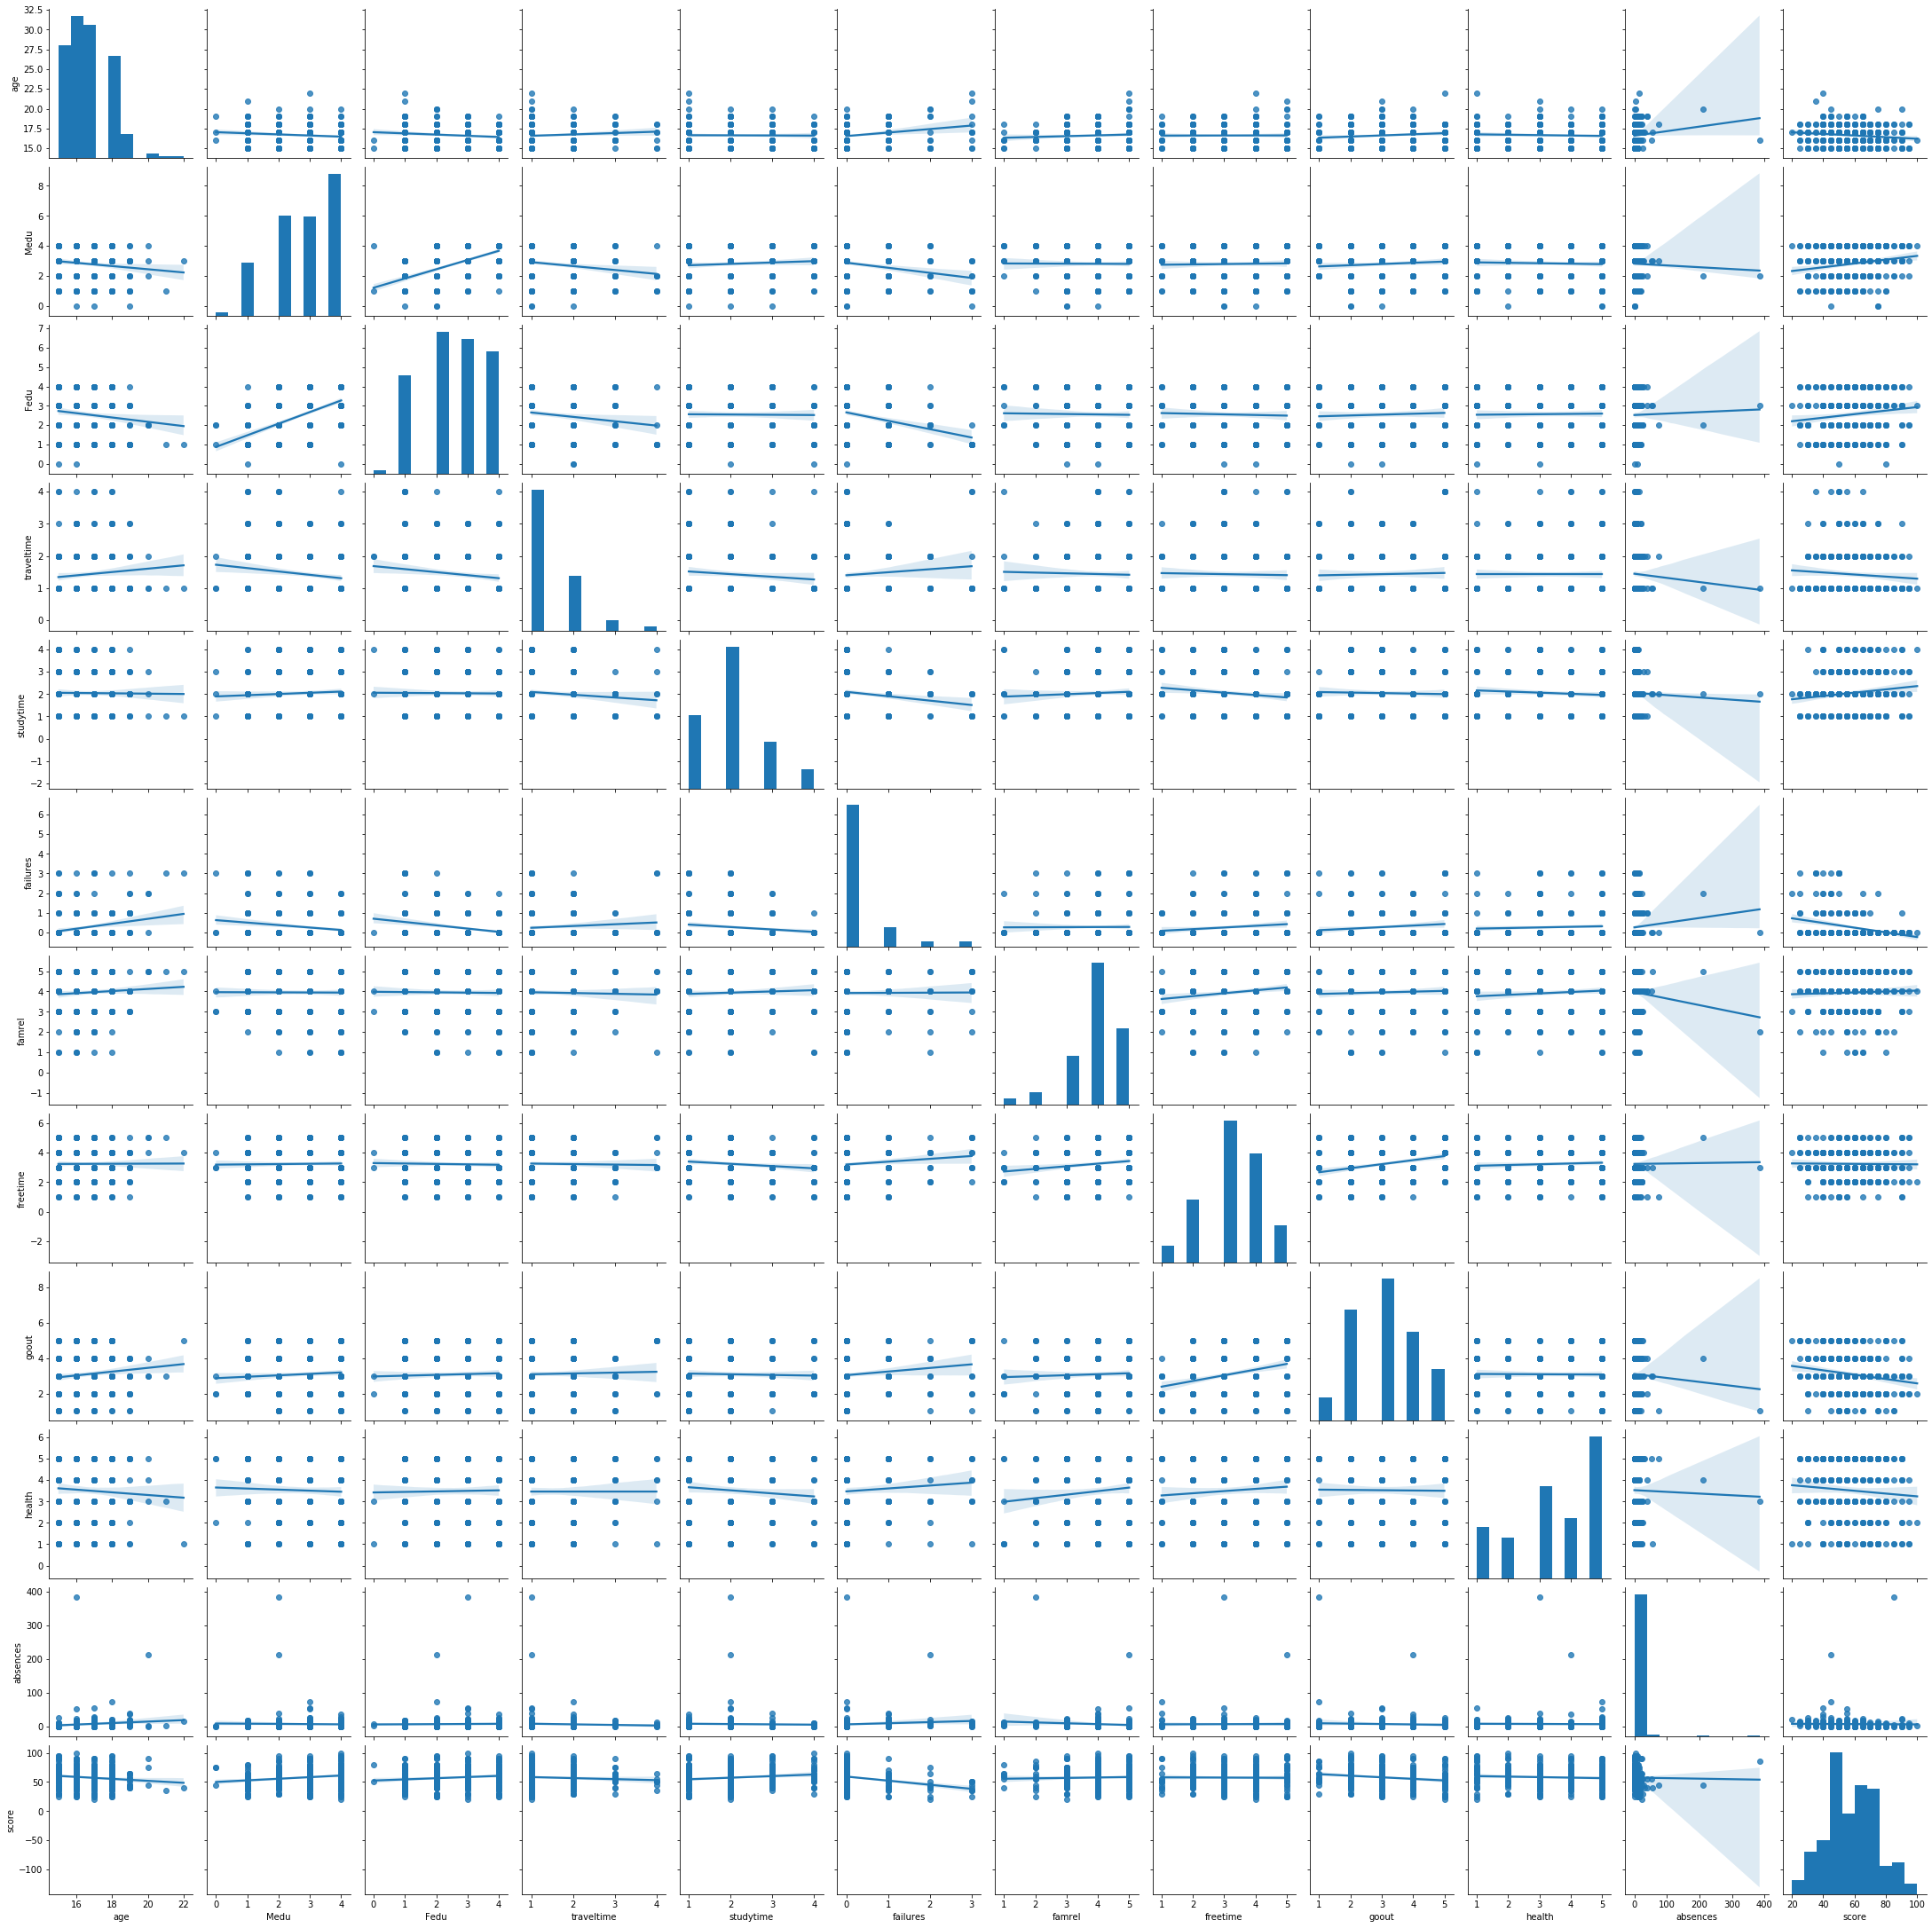

In [23]:
sns.pairplot(stud, kind='reg')

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


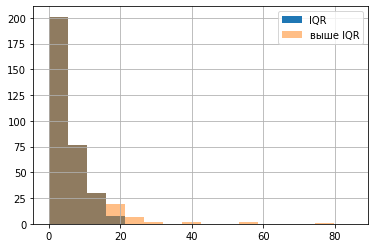

In [29]:
# колонка 'absences': исключаем два выброса  выше 100

stud = stud[stud.absences < 100]

median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 85),
                                                                                  label='IQR')
stud.absences.loc[stud.absences <= 100].hist(alpha=0.5, bins=16, range=(0, 85),
                                             label='выше IQR')
plt.legend()

# исключаем выбросы выше 40

stud = stud[stud.absences < 40]

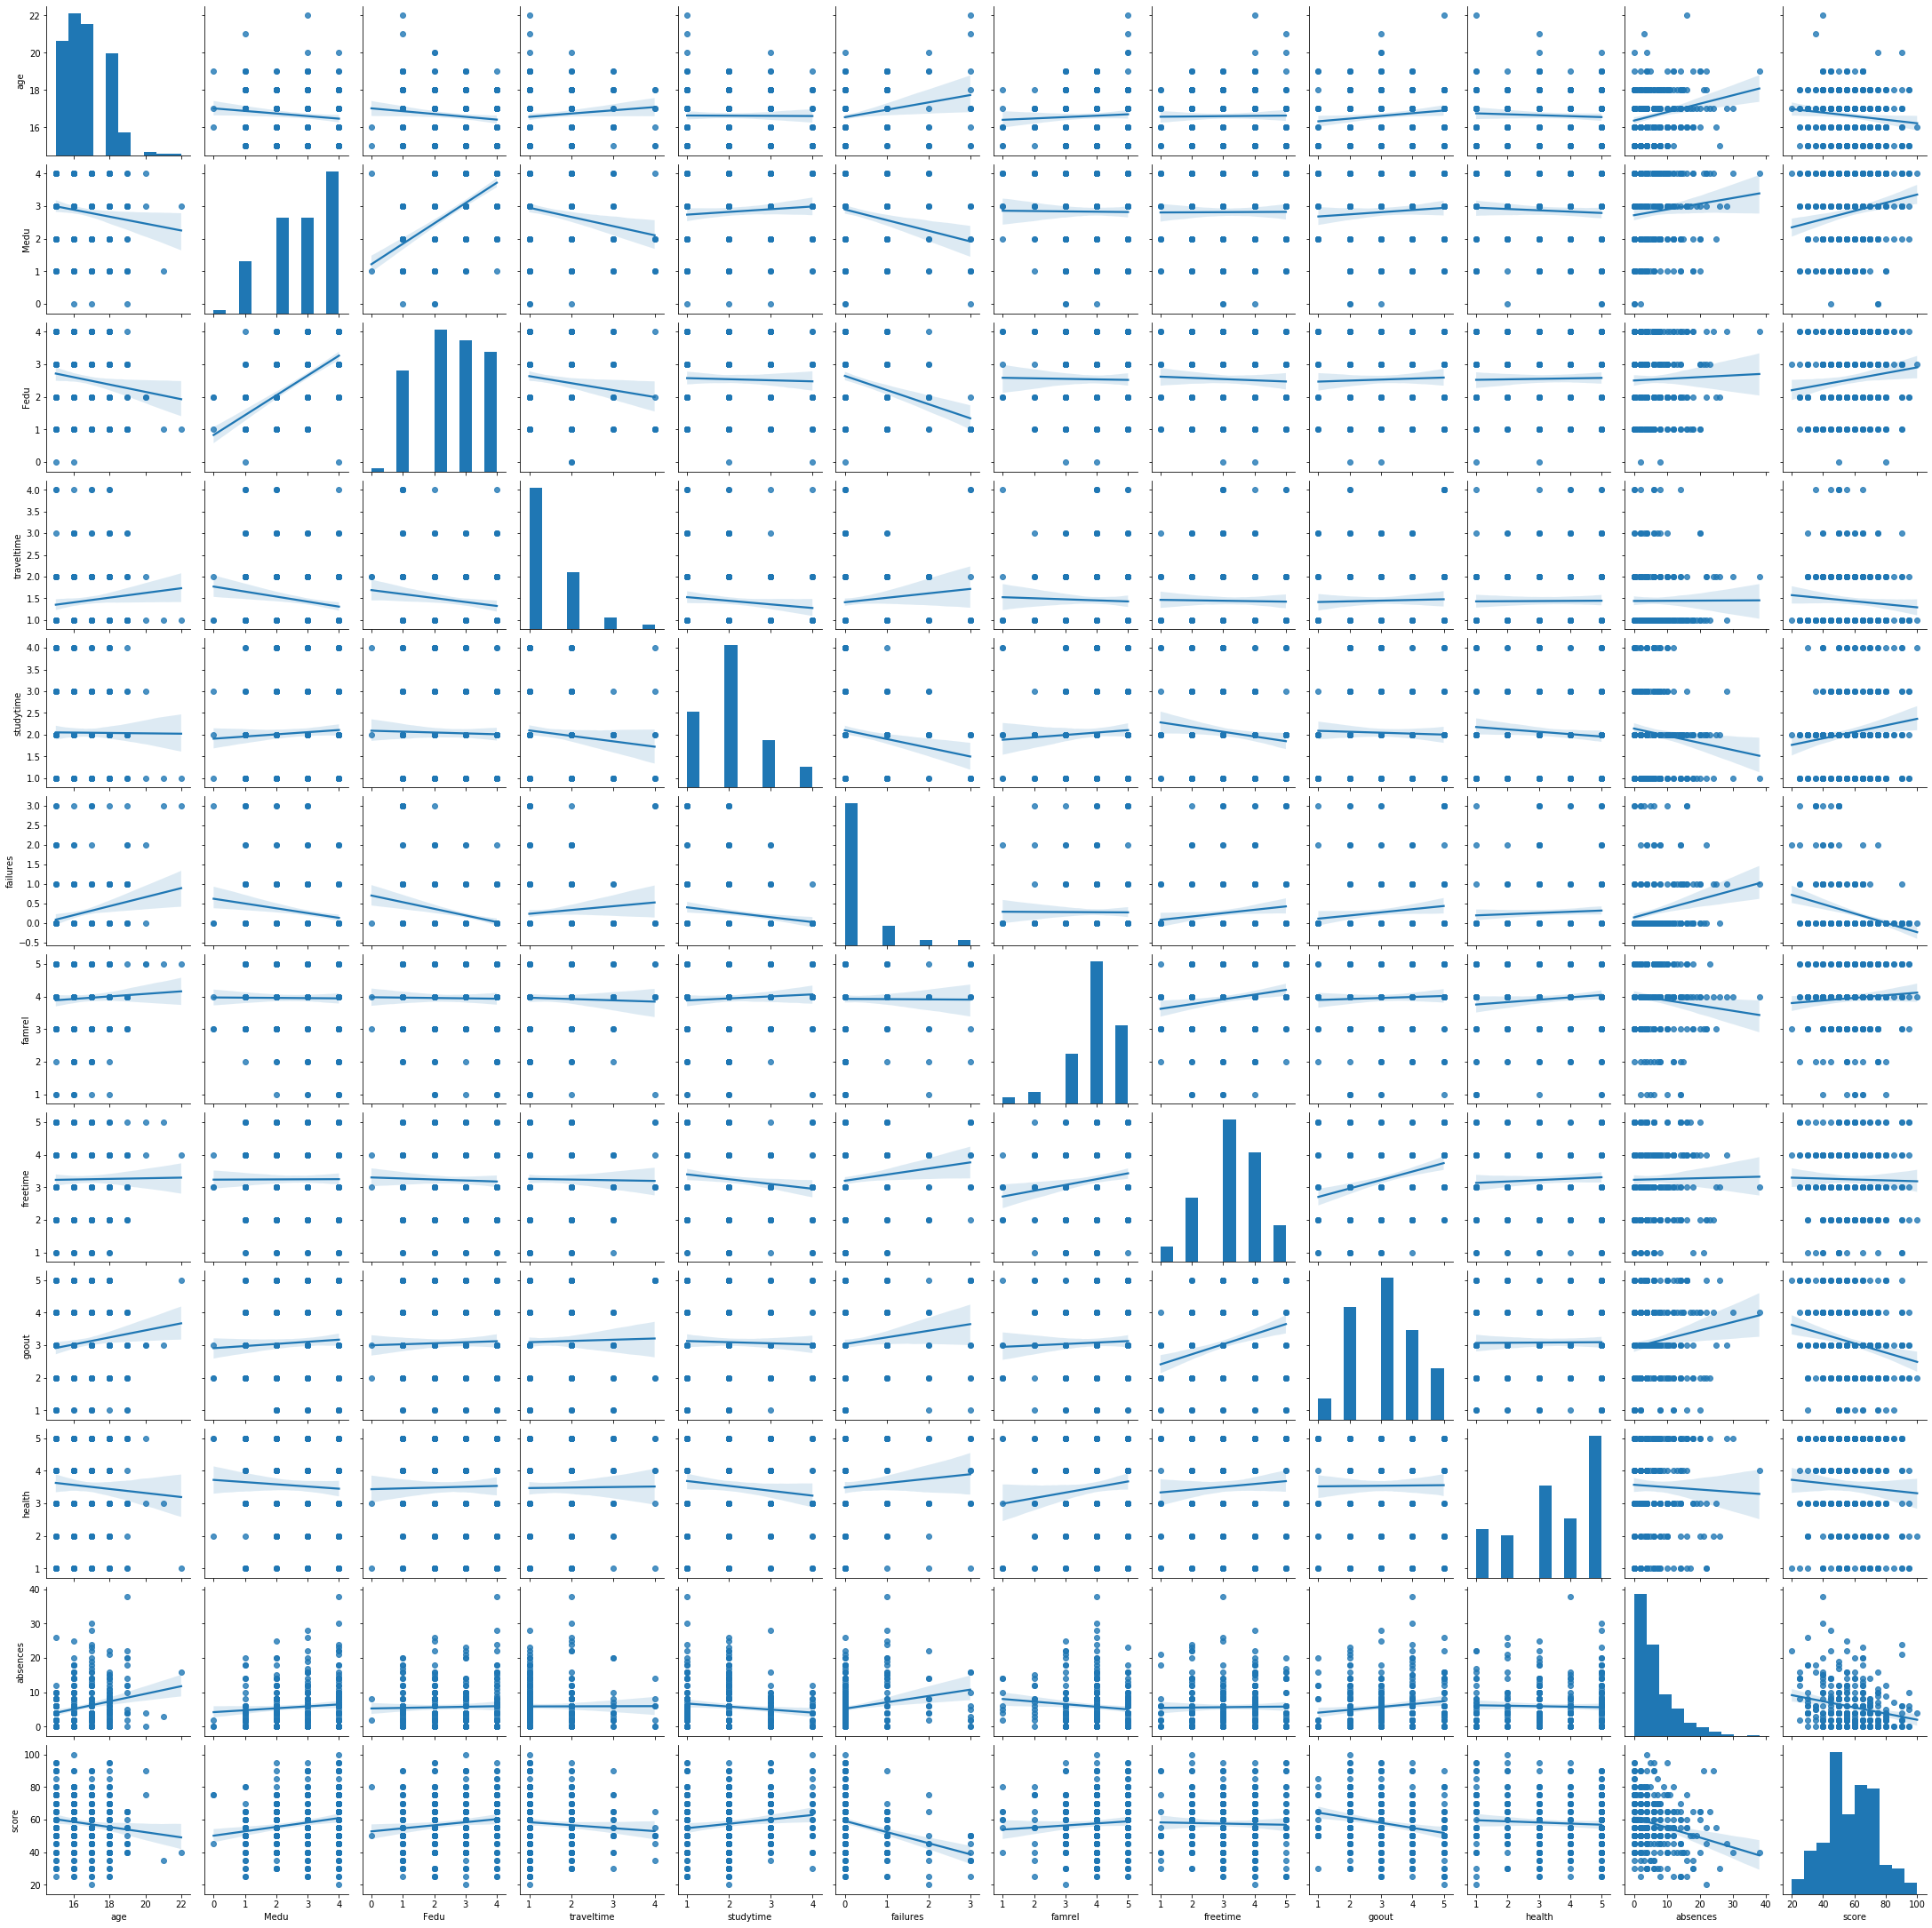

In [30]:
sns.pairplot(stud, kind='reg')

In [31]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.121144,-0.130370,0.097203,-0.006412,0.213608,0.053846,0.012200,0.125251,-0.055572,0.224352,-0.123493
Medu,-0.121144,1.000000,0.617207,-0.180389,0.064581,-0.200011,-0.008367,0.004202,0.065496,-0.052444,0.099599,0.184451
Fedu,-0.130370,0.617207,1.000000,-0.139618,-0.026015,-0.271163,-0.013577,-0.034084,0.031150,0.019141,0.029493,0.128337
traveltime,0.097203,-0.180389,-0.139618,1.000000,-0.101984,0.099398,-0.031194,-0.014619,0.024492,0.007778,0.003393,-0.080185
studytime,-0.006412,0.064581,-0.026015,-0.101984,1.000000,-0.159286,0.058276,-0.126028,-0.027564,-0.090529,-0.120527,0.142311
failures,0.213608,-0.200011,-0.271163,0.099398,-0.159286,1.000000,-0.005560,0.127058,0.128305,0.064452,0.206372,-0.285389
famrel,0.053846,-0.008367,-0.013577,-0.031194,0.058276,-0.005560,1.000000,0.161183,0.036882,0.111704,-0.110018,0.071097
freetime,0.012200,0.004202,-0.034084,-0.014619,-0.126028,0.127058,0.161183,1.000000,0.283082,0.061202,0.015137,-0.022592
goout,0.125251,0.065496,0.031150,0.024492,-0.027564,0.128305,0.036882,0.283082,1.000000,0.007150,0.146332,-0.210368
health,-0.055572,-0.052444,0.019141,0.007778,-0.090529,0.064452,0.111704,0.061202,0.007150,1.000000,-0.032756,-0.059461


In [32]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:300])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

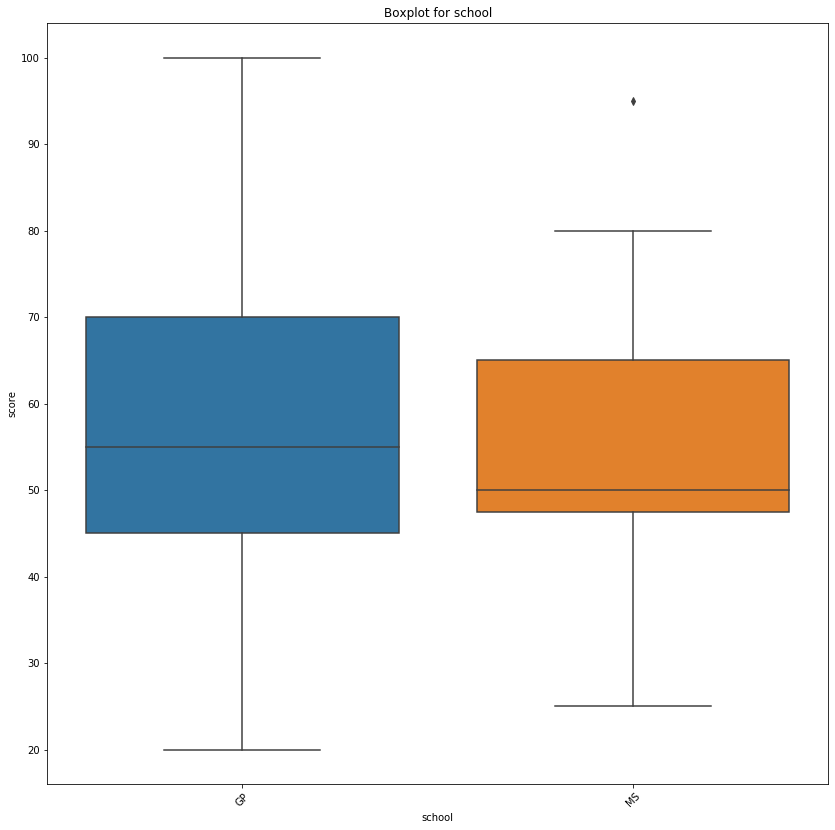

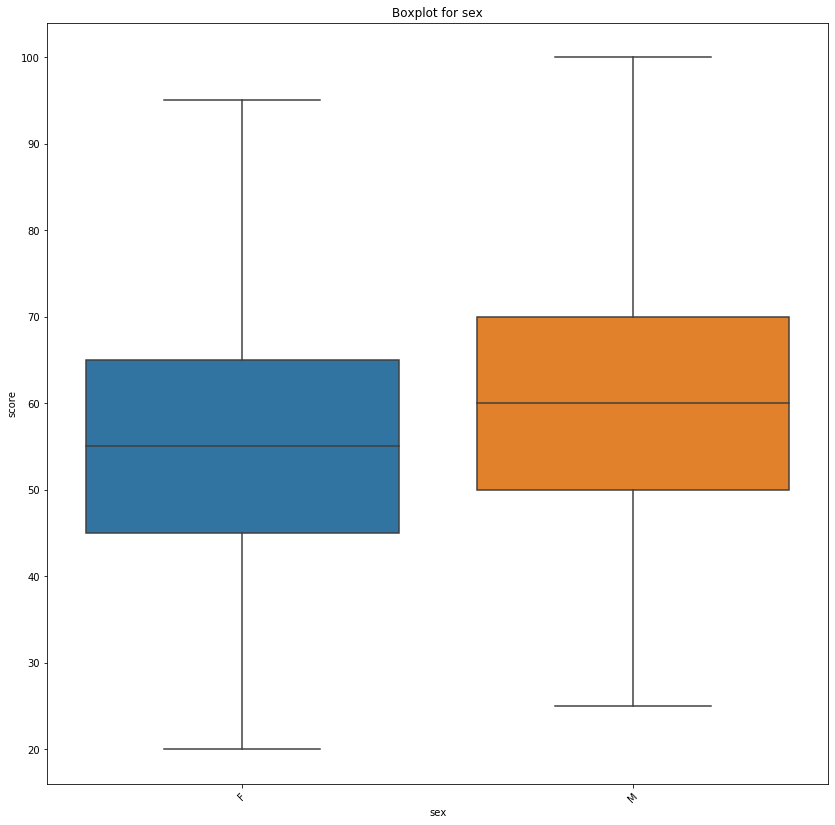

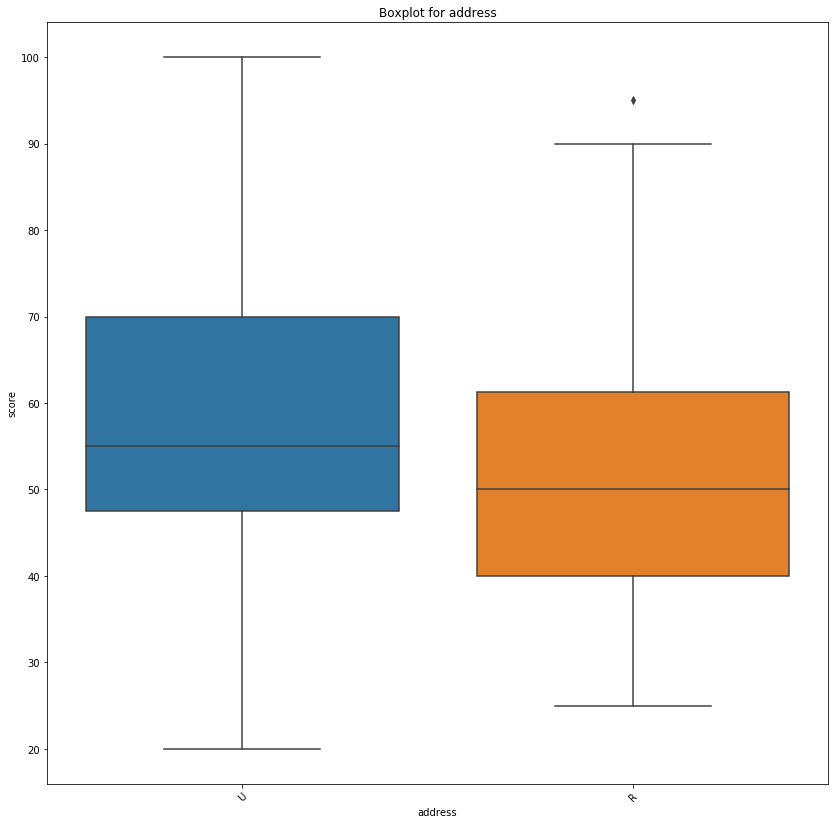

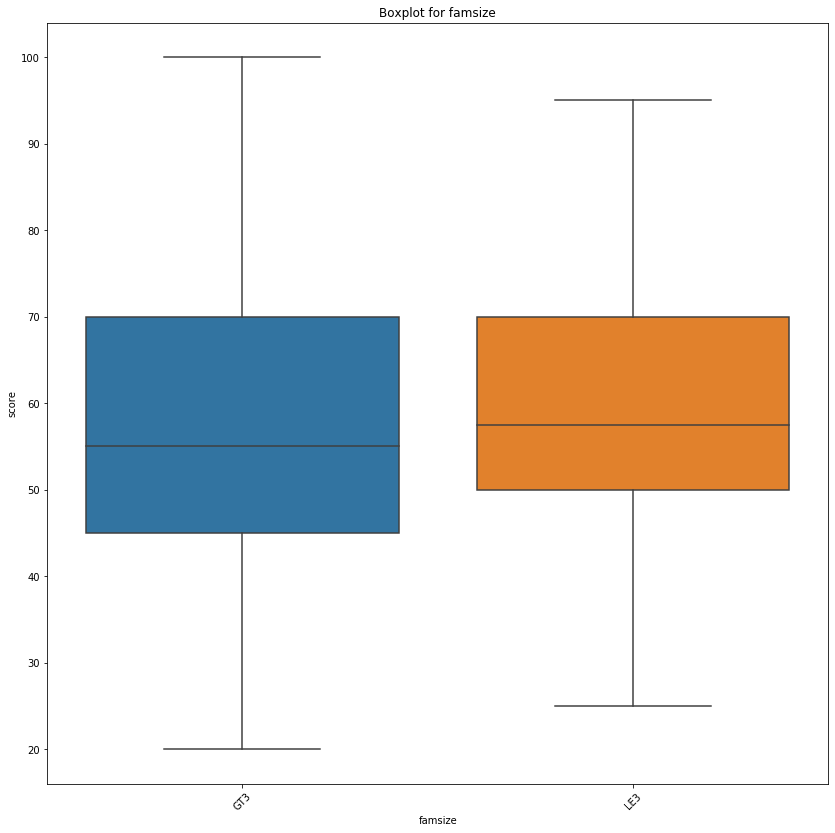

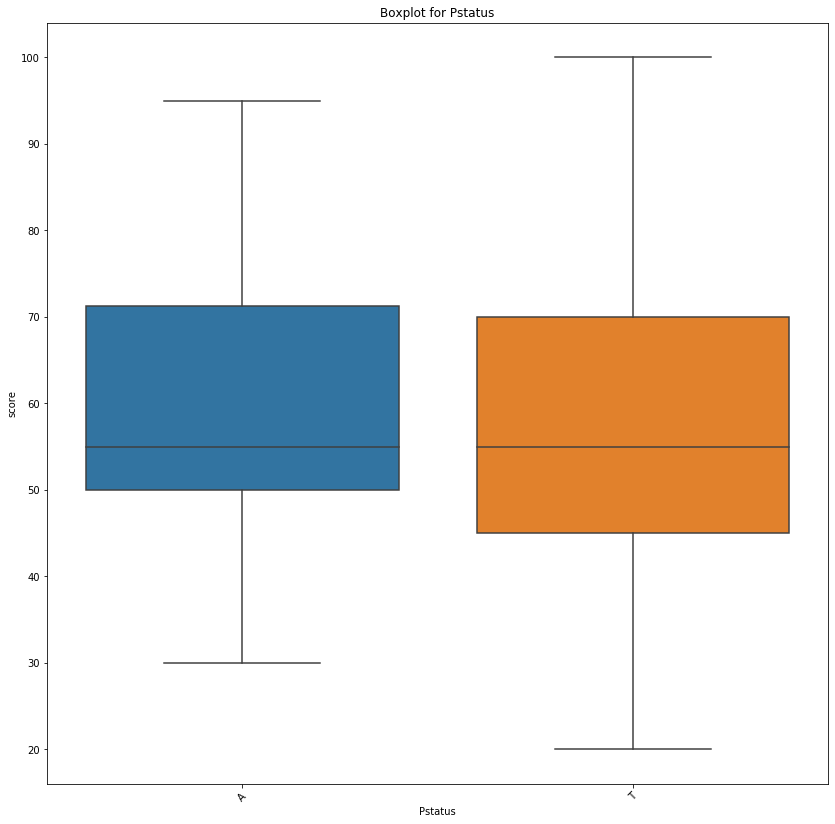

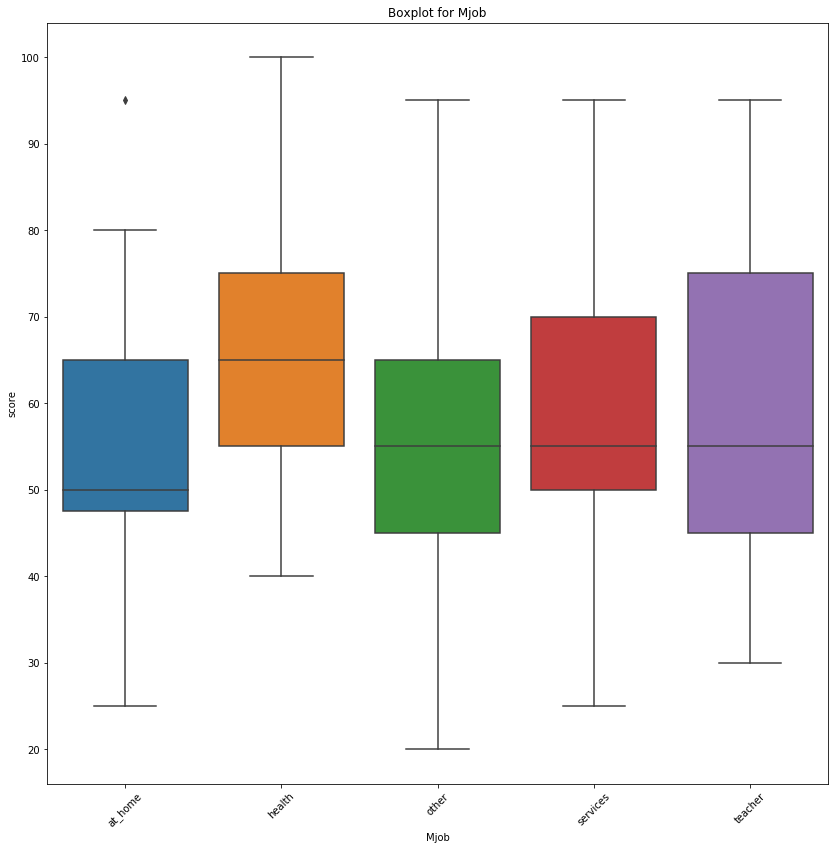

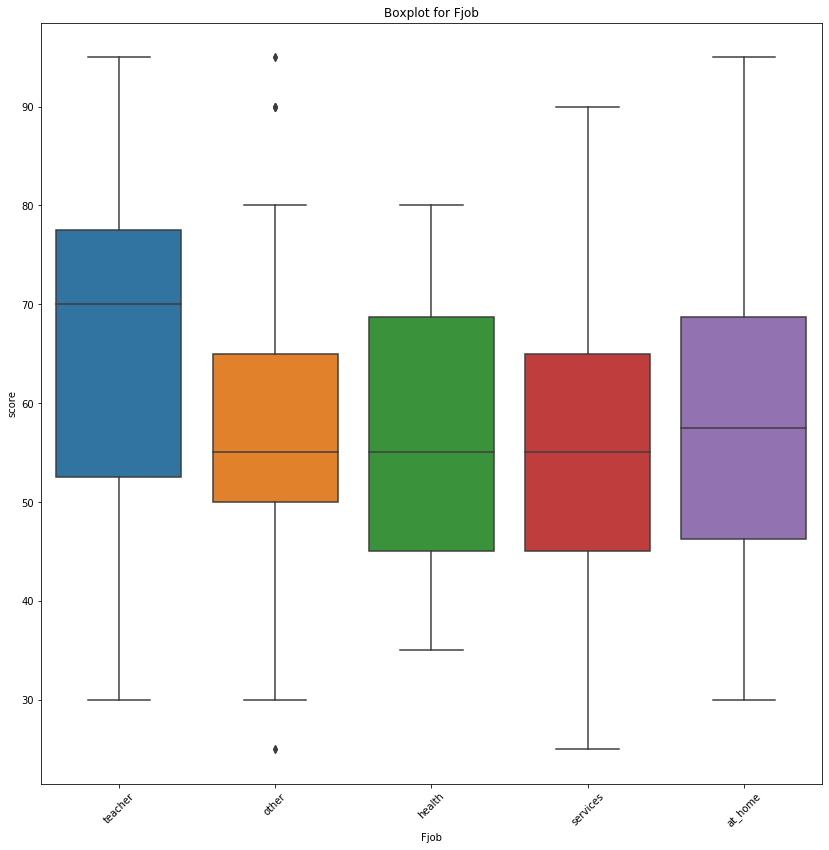

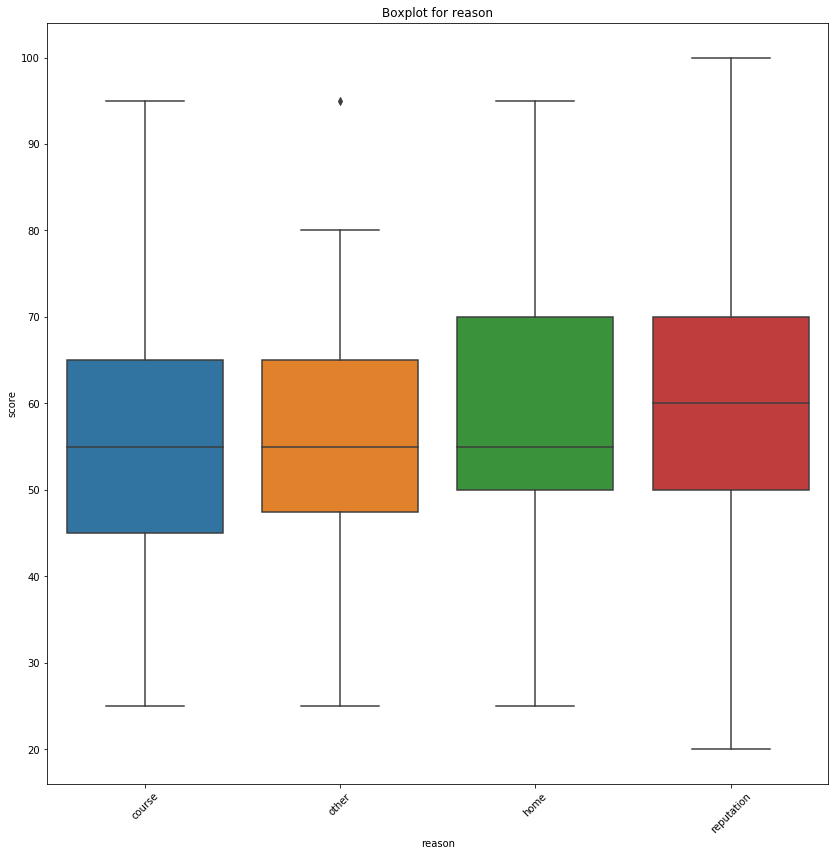

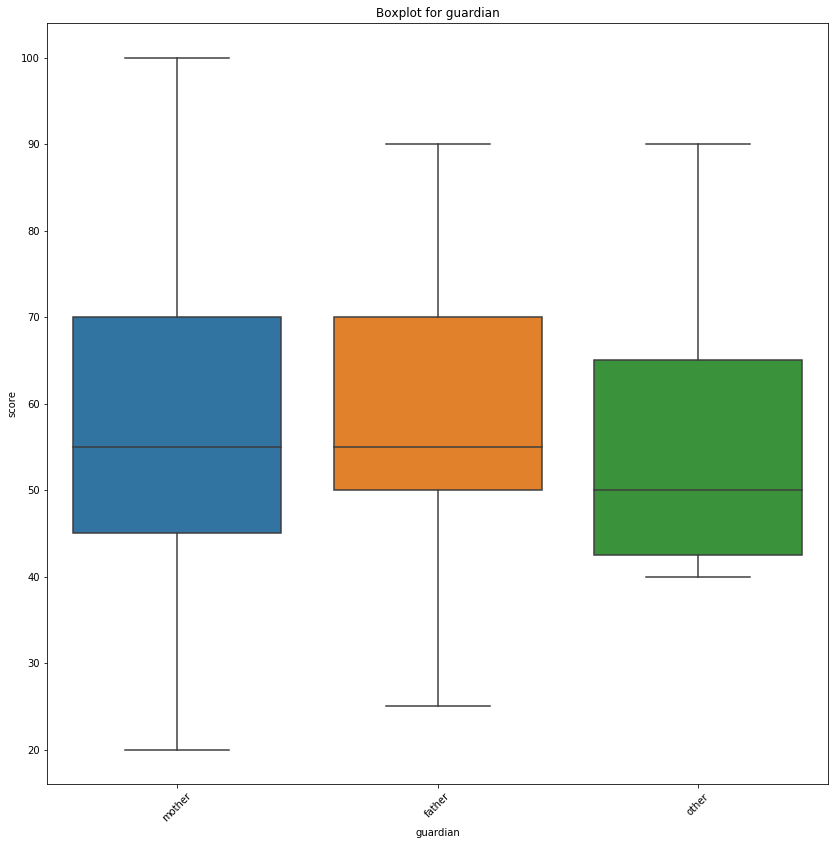

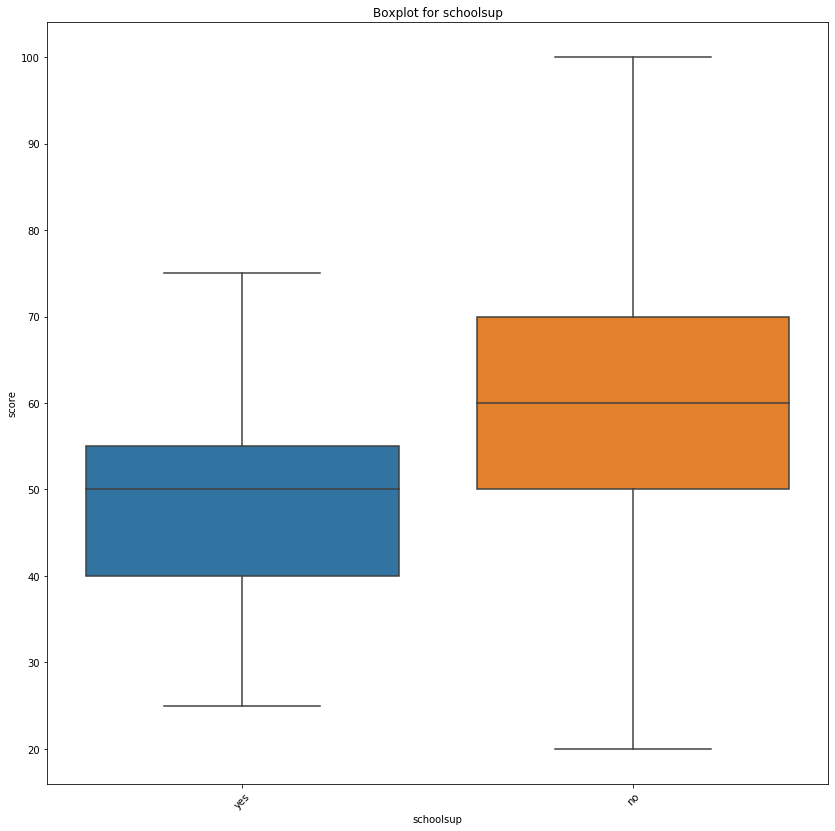

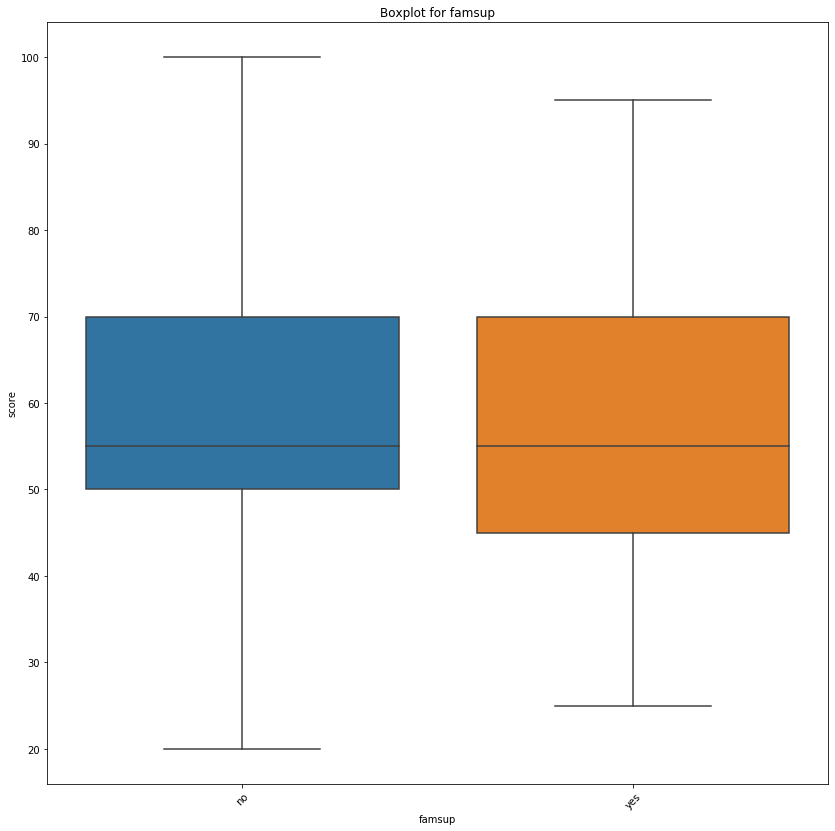

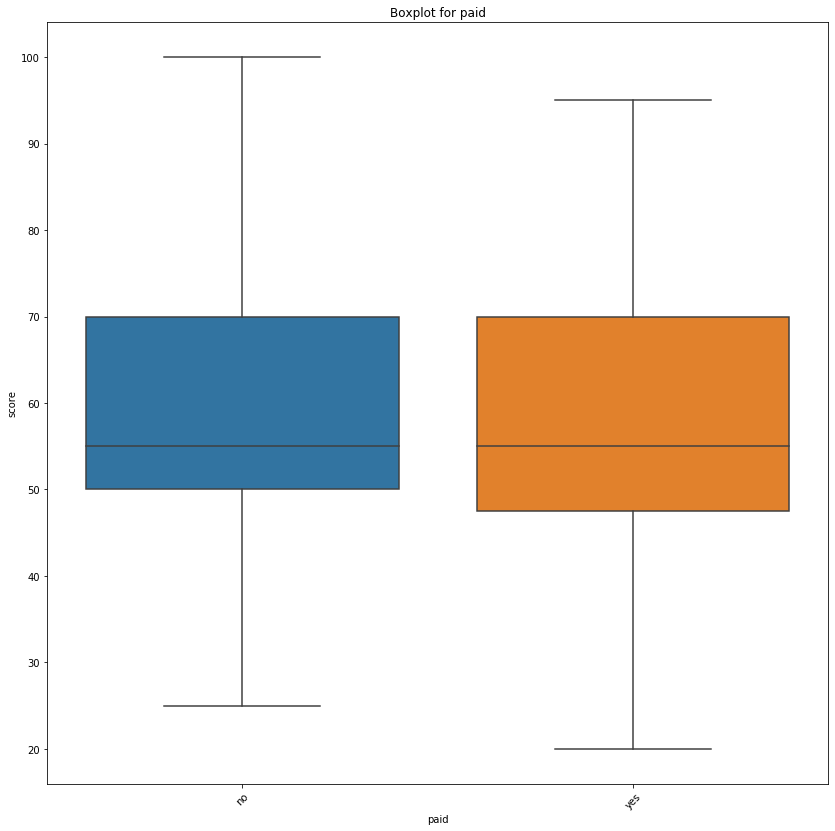

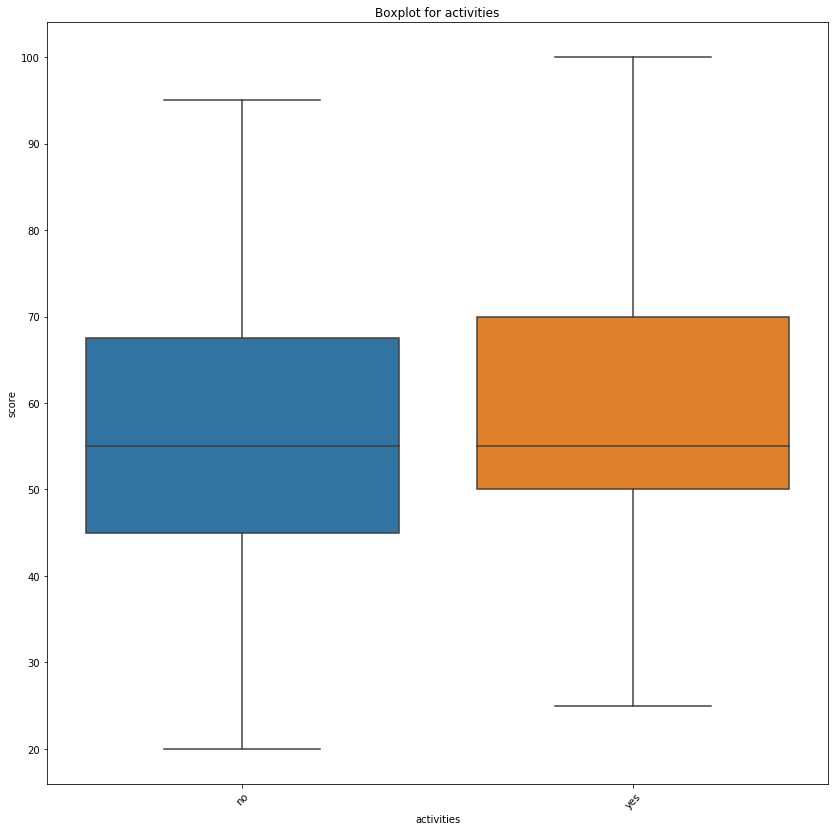

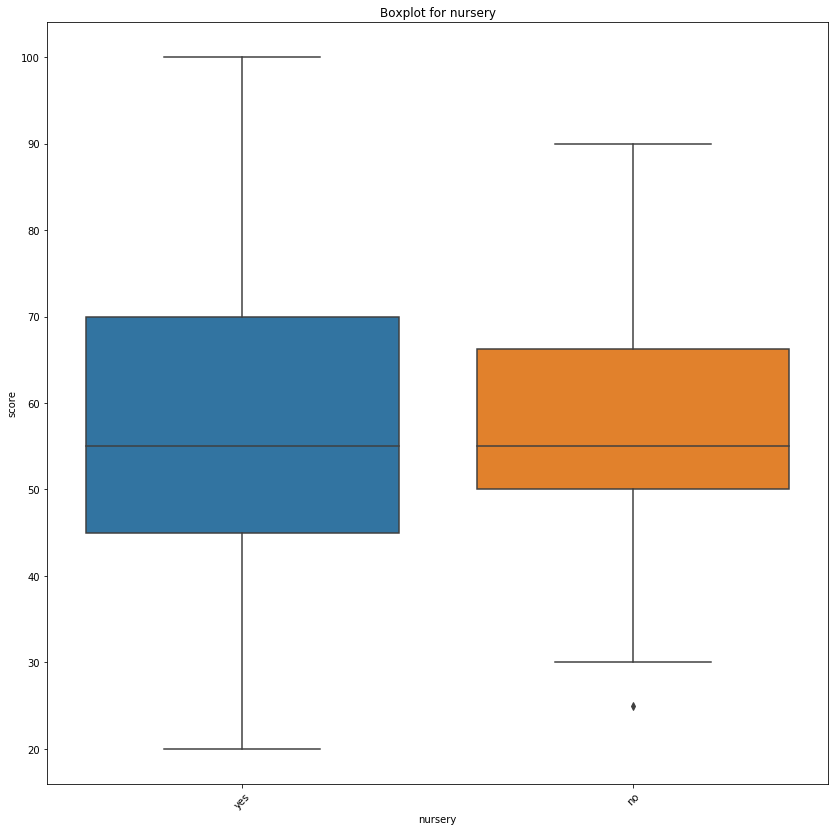

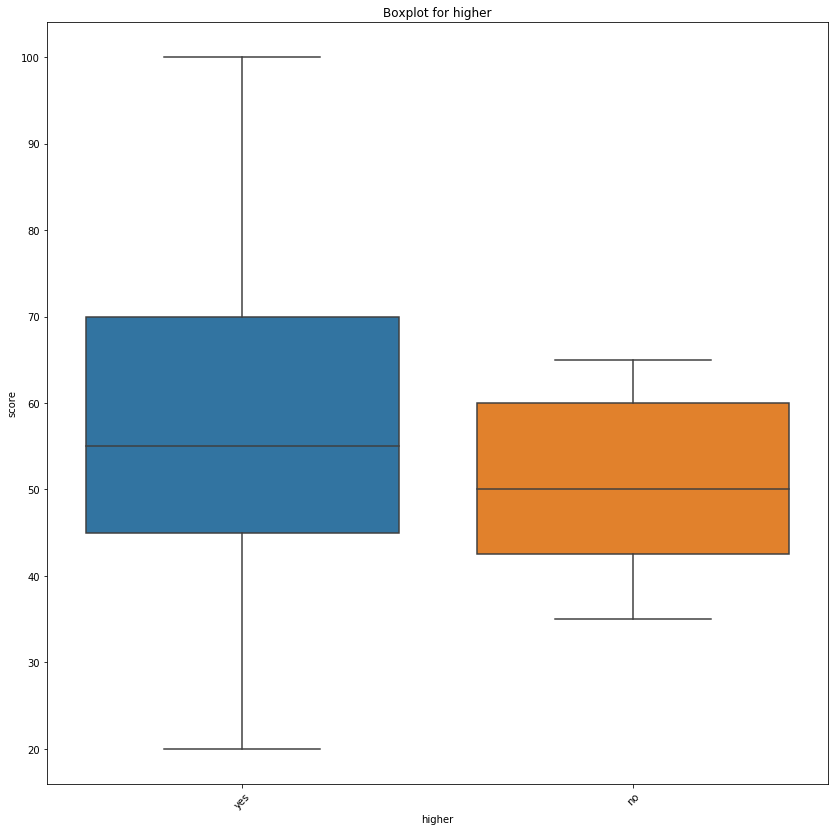

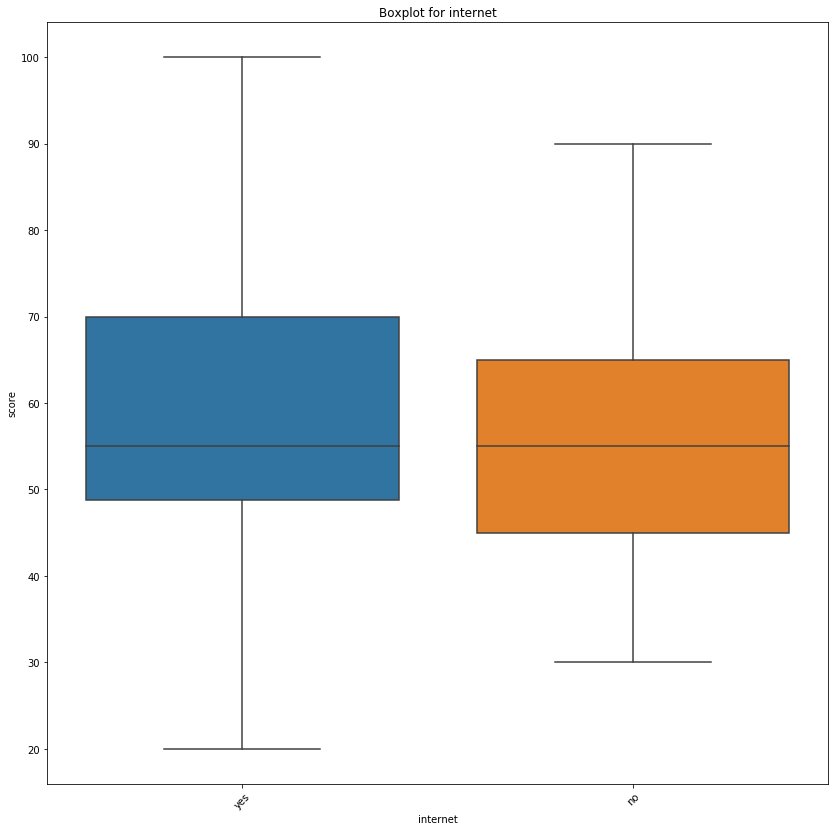

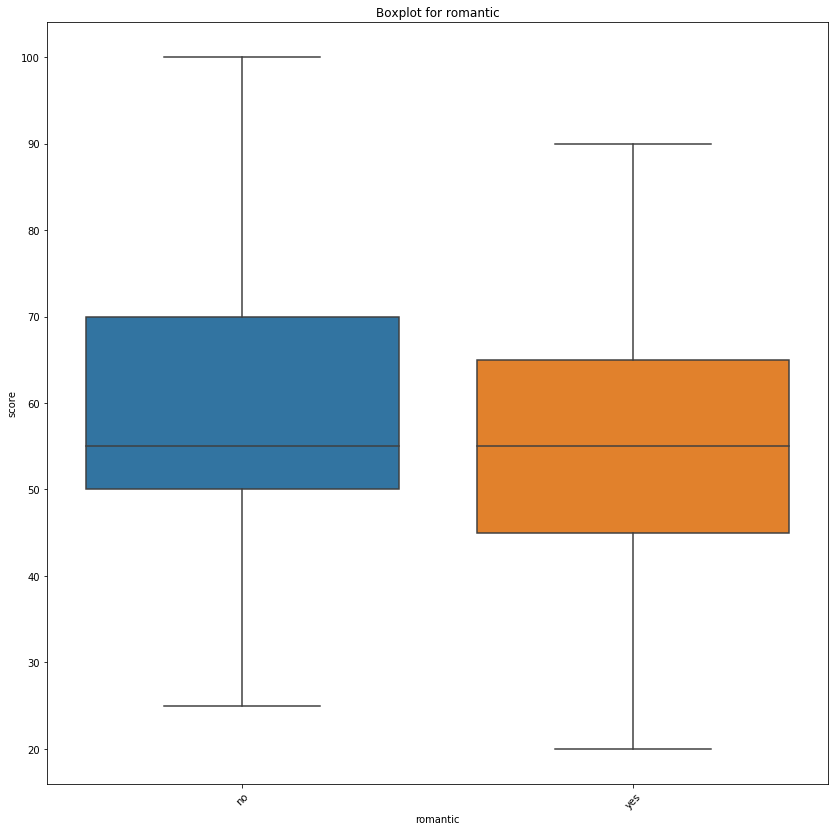

In [33]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [34]:
# По графикам похоже, что все параметры, кроме 'Pstatus', 'famsup',
# 'paid', 'activities','nursery', 'internet', 'romantic' могут влиять на оценку


# Проверим, есть ли статистическая разница в распределении оценок

def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:300]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [35]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [227]:
# в результате анализа влияния всех факторов на результат оценки по математике, получилось:
# только в перых трех столбцах были заполнены все значения
# в столбцах 'Fedu' и 'famrel' были допущенны ошибки при заполнении
# 'score': оставляем в датасете только заполненные значения выше 0 (предполагаем, что 0 ставили, если студенn не появился на экзамене)
# 'absences': исключаем два выброса  выше 40
# Положительная корреляция в 'studytime' и 'studytime, granular'


In [37]:
stud_for_model = stud.loc[:, ['school', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'reason', 'guardian',
                              'traveltime', 'studytime', 'failures', 'schoolsup', 'higher', 'famrel', 'freetime', 'goout',
                              'health', 'absences', 'score']]

In [38]:
stud_for_modek

,school,age,address,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,absences,score
0,GP,18,U,4.0,4.0,at_home,course,mother,2.0,2.0,0.0,yes,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,17,U,1.0,1.0,at_home,course,father,1.0,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,15,U,1.0,1.0,at_home,other,mother,1.0,2.0,3.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,15,U,4.0,2.0,health,home,mother,1.0,3.0,0.0,no,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,16,U,3.0,3.0,other,home,father,1.0,2.0,0.0,no,yes,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,18,U,3.0,1.0,teacher,course,mother,1.0,2.0,0.0,no,yes,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,17,U,3.0,1.0,services,course,mother,2.0,1.0,0.0,no,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,21,R,1.0,1.0,other,course,None,1.0,1.0,3.0,None,None,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,18,R,3.0,2.0,services,course,mother,3.0,1.0,0.0,no,yes,4.0,4.0,1.0,5.0,0.0,50.0
